In [72]:
from netCDF4 import Dataset

mrsofile = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/mrso/mrso_Lmon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gr_185001-201412.nc'
sncfile = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/snc/snc_LImon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gr_185001-201412.nc'
tslfile = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/tsl/tsl_Lmon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gr_185001-201412.nc'
prfile = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/pr/pr_Amon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gr_185001-201412.nc'
tosfile = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/tos/tos_Omon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gn_185001-201412.nc'
ds = Dataset(tosfile, 'r')
#print(ds)

In [80]:
from cdo import Cdo

infile = '/home/kajiyama/conda/nco37/tmp_data/out.nc'
cdo = Cdo()
#cdo.sinfov(input=infile)

In [78]:
from os.path import exists

path = '/work/kajiyama/data/cmip6/raw/IPSL-CM5A2-INCA/tos/tos_Omon_IPSL-CM5A2-INCA_historical_r1i1p1f1_gn_185001-201412.nc'
print(exists(path))

True


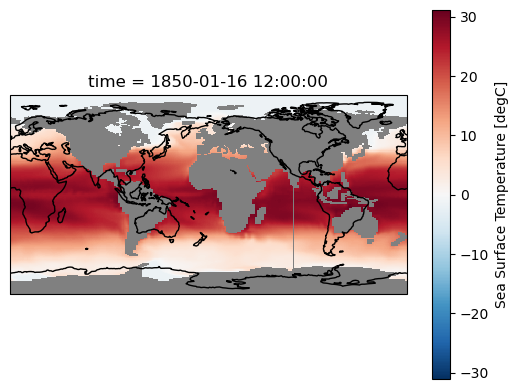

In [79]:
from cdo import Cdo
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray
import numpy as np

variable = 'tos'

cdo = Cdo()
projection = ccrs.PlateCarree(central_longitude=180)
img_extent = (-180, 180, -90, 90)
val = cdo.remapbil('global_1', input=f'-seltimestep,1 '+infile, returnXArray=variable)
if variable == 'tsl':
    data = np.mean(val, axis=1).plot(subplot_kws=dict(projection=projection, facecolor='gray'),
                    transform=projection)
else:   
    data = val.plot(subplot_kws=dict(projection=projection, facecolor='gray'),
                    transform=projection)
data.axes.coastlines()
plt.show() 